# Titanic Dataset - 模型训练与评估

这个notebook主要进行以下工作：
1. 加载预处理后的数据
2. 构建多个机器学习模型
3. 模型评估与比较
4. 模型优化
5. 生成预测结果

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

In [2]:
# 加载预处理后的数据
train_data = pd.read_csv('data/processed_train.csv')
test_data = pd.read_csv('data/processed_test.csv')

# 分离特征和目标变量
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("训练集形状:", X_train.shape)
print("验证集形状:", X_val.shape)

训练集形状: (712, 17)
验证集形状: (179, 17)


## 1. 基础模型训练与评估

In [3]:
# 定义要训练的模型
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 训练并评估每个模型
results = []
for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 在验证集上预测
    val_pred = model.predict(X_val)
    
    # 计算准确率
    accuracy = accuracy_score(y_val, val_pred)
    
    # 进行交叉验证
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results.append({
        'Model': name,
        'Validation Accuracy': accuracy,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# 显示结果
results_df = pd.DataFrame(results)
print("模型性能比较:")
print(results_df)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

模型性能比较:
                 Model  Validation Accuracy   CV Mean    CV Std
0  Logistic Regression             0.815642  0.827223  0.012577
1        Decision Tree             0.765363  0.764060  0.015537
2        Random Forest             0.837989  0.797764  0.017278
3                  SVM             0.664804  0.676923  0.016235
4                  KNN             0.726257  0.717748  0.029123


## 2. 随机森林模型优化

In [4]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=42)

# 进行网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳参数: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
最佳得分: 0.8313995863291638


分类报告:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11

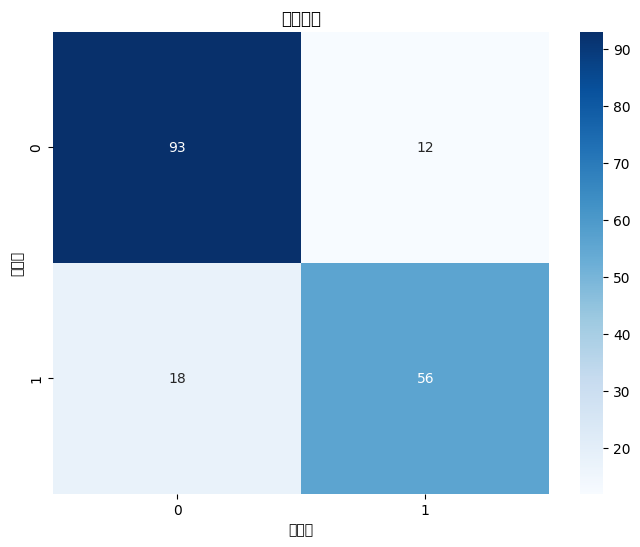

In [5]:
# 使用最佳参数创建模型
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# 在验证集上评估
y_pred = best_rf.predict(X_val)

# 打印分类报告
print("分类报告:")
print(classification_report(y_val, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵')
plt.ylabel('真实值')
plt.xlabel('预测值')
plt.show()

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11

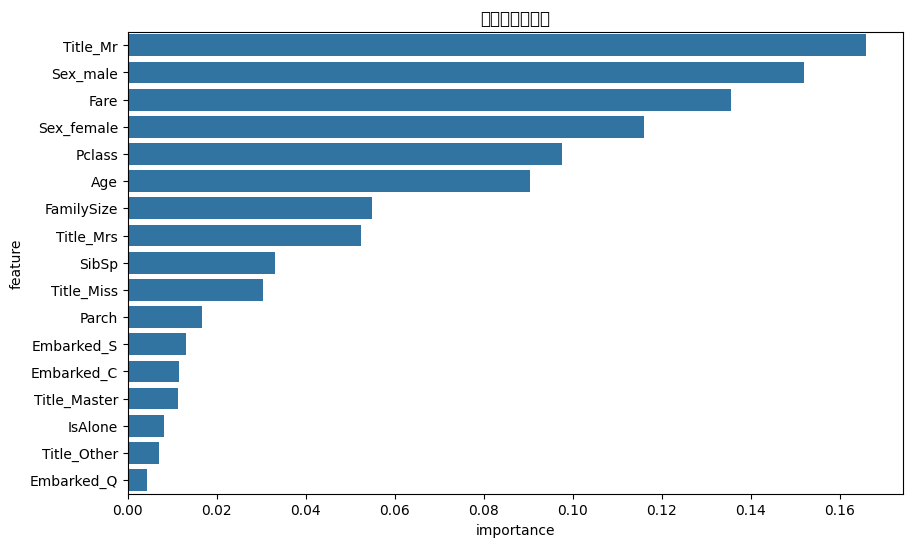

In [6]:
# 特征重要性分析
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('特征重要性排序')
plt.show()

## 3. 生成预测结果

In [7]:
# 使用最佳模型对测试集进行预测
test_predictions = best_rf.predict(test_data)

# 创建提交文件
submission = pd.DataFrame({
    'PassengerId': range(892, 892 + len(test_predictions)),
    'Survived': test_predictions
})

# 保存预测结果
submission.to_csv('data/submission.csv', index=False)
print("预测结果已保存到 'submission.csv'")

预测结果已保存到 'submission.csv'
